Data loading, pre-processing and representation
---



In [2]:
#adding libraries
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression  
import csv          
import requests     
import numpy as np  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import pandas

In [3]:
my_dataset = pd.read_csv('diabetes.csv')
#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Datatype matching

In [4]:
# In the dataset there are no categorical feature, therefore, datatypes don't need to be changed
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


###Representing and analysing data about the dataset

In [5]:

print(my_dataset.describe())
print(my_dataset.info()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

You can see above that there are two data objects in the dataset with missing values for the attributes "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g". To obtain the values, we replace the missing values by the mean value of the attribute


###Replacing missing values

In [6]:
#In our dataset neither object misses a feature, so the functions for willing blanks are not needed
#On the other hand there are some outliers which are replaced with the mean values
my_dataset['BloodPressure'].replace(0, my_dataset['BloodPressure'].mean(), inplace=True)
my_dataset['SkinThickness'].replace(0, my_dataset['SkinThickness'].mean(), inplace=True)
my_dataset['BMI'].replace(0, my_dataset['BMI'].mean(), inplace=True)
print(my_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
None


In [7]:
#For attributes of categorical type, the values are checked against possible values
print(my_dataset['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [8]:
#Creating a dataset where labels are excluded leaving feature columns only
clustering_dataset = my_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

### Data normalization

In [9]:
#Data normalisation is applied for four attributes to make the data more consistent
my_dataset['Pregnancies'] = (my_dataset['Pregnancies'] - my_dataset['Pregnancies'].min())/(my_dataset['Pregnancies'].max() - my_dataset['Pregnancies'].min())
my_dataset['Glucose'] = (my_dataset['Glucose'] - my_dataset['Glucose'].min())/(my_dataset['Glucose'].max() - my_dataset['Glucose'].min())
my_dataset['BloodPressure'] = (my_dataset['BloodPressure'] - my_dataset['BloodPressure'].min())/(my_dataset['BloodPressure'].max() - my_dataset['BloodPressure'].min())
my_dataset['SkinThickness'] = (my_dataset['SkinThickness'] - my_dataset['SkinThickness'].min())/(my_dataset['SkinThickness'].max() - my_dataset['SkinThickness'].min())
my_dataset['Insulin'] = (my_dataset['Insulin'] - my_dataset['Insulin'].min())/(my_dataset['Insulin'].max() - my_dataset['Insulin'].min())
my_dataset['BMI'] = (my_dataset['BMI'] - my_dataset['BMI'].min())/(my_dataset['BMI'].max() - my_dataset['BMI'].min())
my_dataset['DiabetesPedigreeFunction'] = (my_dataset['DiabetesPedigreeFunction'] - my_dataset['DiabetesPedigreeFunction'].min())/(my_dataset['DiabetesPedigreeFunction'].max() - my_dataset['DiabetesPedigreeFunction'].min())
my_dataset['Age'] = (my_dataset['Age'] - my_dataset['Age'].min())/(my_dataset['Age'].max() - my_dataset['Age'].min())
print(my_dataset.head(10))
print(my_dataset.describe())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.489796       0.304348  0.000000  0.314928   
1     0.058824  0.427136       0.428571       0.239130  0.000000  0.171779   
2     0.470588  0.919598       0.408163       0.147135  0.000000  0.104294   
3     0.058824  0.447236       0.428571       0.173913  0.111111  0.202454   
4     0.000000  0.688442       0.163265       0.304348  0.198582  0.509202   
5     0.294118  0.582915       0.510204       0.147135  0.000000  0.151329   
6     0.176471  0.391960       0.265306       0.271739  0.104019  0.261759   
7     0.588235  0.577889       0.460260       0.147135  0.000000  0.349693   
8     0.117647  0.989950       0.469388       0.413043  0.641844  0.251534   
9     0.470588  0.628141       0.734694       0.147135  0.000000  0.282057   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667      

# Data Visualization

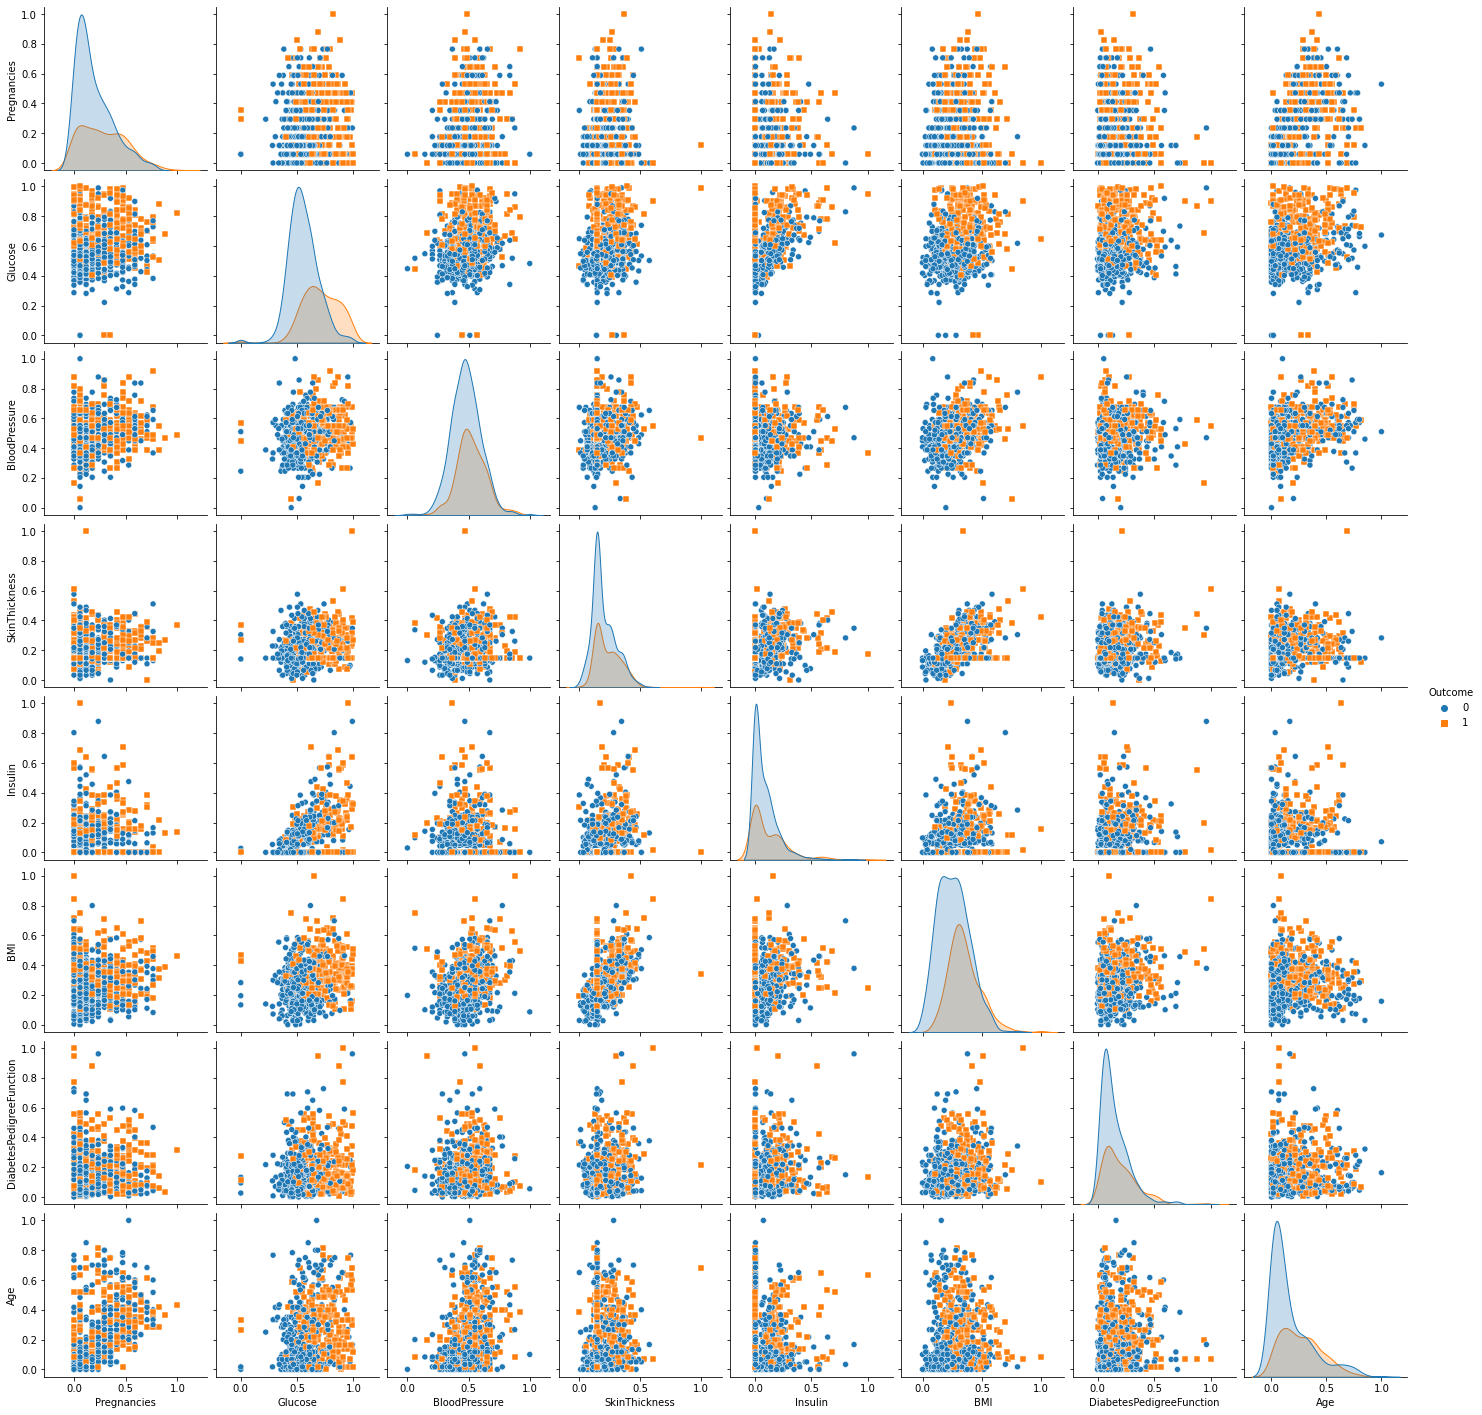

In [10]:
sns.pairplot(my_dataset, hue='Outcome', diag_kind='kde', markers=['o', 's'])
plt.show()

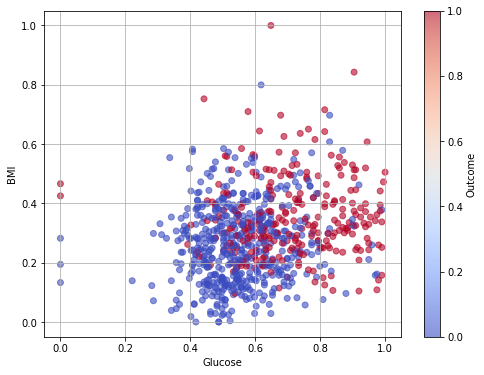

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(my_dataset['Glucose'], my_dataset['BMI'], c=my_dataset['Outcome'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

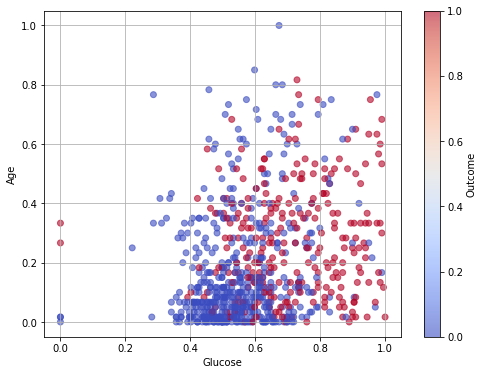

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(my_dataset['Glucose'], my_dataset['Age'], c=my_dataset['Outcome'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

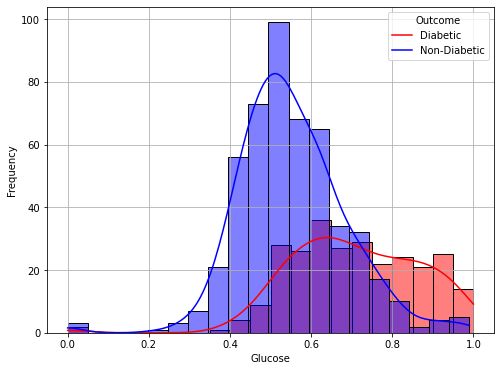

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(my_dataset[my_dataset['Outcome'] == 1]['Glucose'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(my_dataset[my_dataset['Outcome'] == 0]['Glucose'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic'])
plt.grid(True)
plt.show()

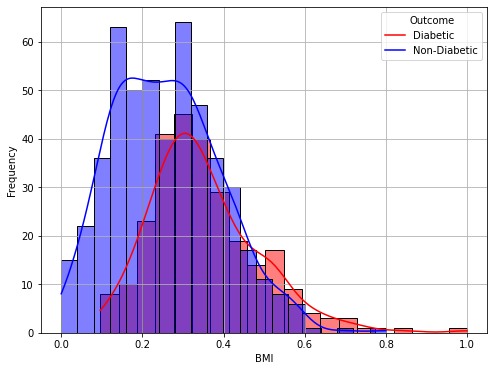

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(my_dataset[my_dataset['Outcome'] == 1]['BMI'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(my_dataset[my_dataset['Outcome'] == 0]['BMI'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic'])
plt.grid(True)
plt.show()

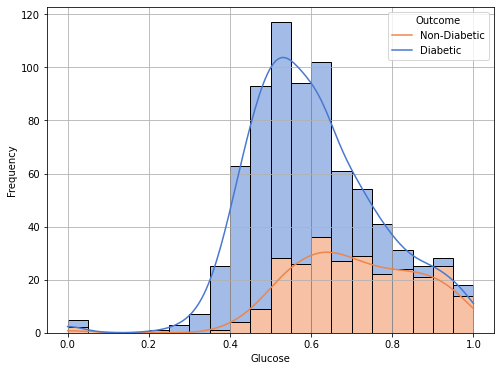

In [15]:
feature1 = 'Glucose'

bins = 20

plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x=feature1, hue='Outcome', kde=True, bins=bins, palette='muted', multiple='stack')
plt.xlabel(feature1)
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

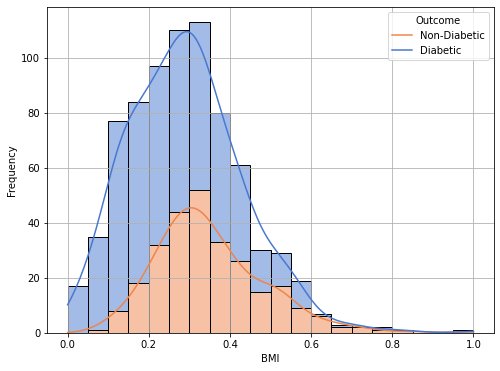

In [16]:
feature2 = 'BMI'

bins = 20

plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x=feature2, hue='Outcome', kde=True, bins=bins, palette='muted', multiple='stack')
plt.xlabel(feature2)
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

In [17]:
glucose_bmi = np.corrcoef(my_dataset['Glucose'], my_dataset['BMI'])[0, 1]
glucose_age = np.corrcoef(my_dataset['Glucose'], my_dataset['Age'])[0, 1]
print("Glucose and BMI correlation:", glucose_bmi)
print("Glucose and Age correlation:", glucose_age)

Glucose and BMI correlation: 0.2188139780359937
Glucose and Age correlation: 0.2635143198243335


In [18]:
features = my_dataset.columns[:-1]
stats_dict = {}
for i in features:
    
    mean_value = np.mean(my_dataset[i])
    median_value = np.median(my_dataset[i])
    std_value = np.std(my_dataset[i])
    stats_dict[i] = {'Mean': mean_value,'Median': median_value,'Standard Deviation': std_value,}

for j, stats in stats_dict.items():
    print(f"Statistical Indicators for '{j}':")
    for stat_name, stat_value in stats.items():
        print(f"{stat_name}: {stat_value}")
    print()


Statistical Indicators for 'Pregnancies':
Mean: 0.2261795343137268
Median: 0.17647058823529413
Standard Deviation: 0.19808138896523542

Statistical Indicators for 'Glucose':
Mean: 0.6075102072864326
Median: 0.5879396984924623
Standard Deviation: 0.1605617884834308

Statistical Indicators for 'BloodPressure':
Mean: 0.4923959848832111
Median: 0.4897959183673469
Standard Deviation: 0.12355143931203286

Statistical Indicators for 'SkinThickness':
Mean: 0.2131139045752184
Median: 0.17391304347826086
Standard Deviation: 0.1046192209709004

Statistical Indicators for 'Insulin':
Mean: 0.09432562549251379
Median: 0.03605200945626477
Standard Deviation: 0.13613350976911662

Statistical Indicators for 'BMI':
Mean: 0.2914275082911284
Median: 0.28220858895705525
Standard Deviation: 0.14050911850225312

Statistical Indicators for 'DiabetesPedigreeFunction':
Mean: 0.16817946288784516
Median: 0.12574722459436377
Standard Deviation: 0.1413803655117972

Statistical Indicators for 'Age':
Mean: 0.20401475

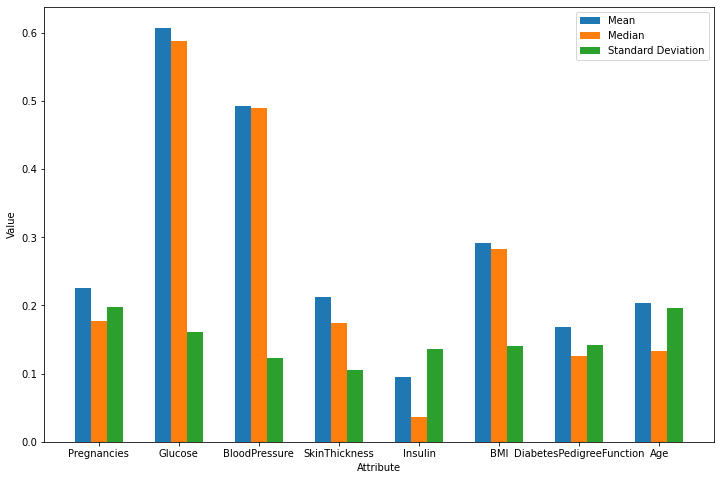

In [19]:

attributes = list(stats_dict.keys())
stats_names = list(stats_dict[attributes[0]].keys())

num_attributes = len(attributes)
num_stats = len(stats_names)

bar_width = 0.2

index = np.arange(num_attributes)

plt.figure(figsize=(12, 8))

for i, stat_name in enumerate(stats_names):
    stat_values = [stats_dict[attr][stat_name] for attr in attributes]
    plt.bar(index + i * bar_width, stat_values, bar_width, label=stat_name)

plt.xlabel('Attribute')
plt.ylabel('Value')
plt.xticks(index + (num_stats - 1) * bar_width / 2, attributes)
plt.legend()
plt.show()

&nbsp;

&nbsp;

&nbsp;

# KMeans Algorithm

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics

[0.5885301148093239, 0.5375324982602793, 0.4651989612299497, 0.43635420809531994, 0.3662053109026607]


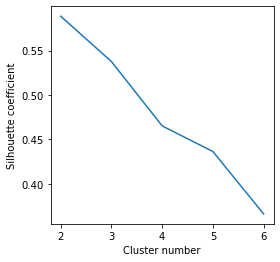

In [22]:
Silhouette_coefficient = []
for i in range(2,7): 
    kmeans_model = KMeans(n_clusters = i, init = "k-means++")
    kmeans_model.fit(clustering_dataset)
    Silhouette_coefficient.append(metrics.silhouette_score(clustering_dataset, kmeans_model.labels_))
print(Silhouette_coefficient)
plt.figure(figsize=(4,4))
plt.plot(range(2,7), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

___We can see on this silhouette score plot that the more clusters there are the less efficient the clustering will be. Therefore, we decided to create only 2 clusters as it seems to be the best option.___

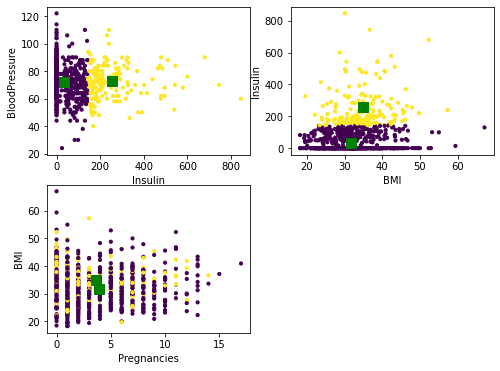

In [23]:
import matplotlib.pyplot as plt
kmeans_model = KMeans(n_clusters=2, init = "k-means++").fit(clustering_dataset)
centroids = kmeans_model.cluster_centers_
y_pred = kmeans_model.predict(clustering_dataset)
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)                            
plt.scatter(clustering_dataset['Insulin'], clustering_dataset['BloodPressure'], s = 10, c = y_pred)
plt.scatter(centroids[0,4], centroids[0,2], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,4], centroids[1,2], s = 100, c = 'g', marker = 's')
plt.xlabel(clustering_dataset.columns[4])
plt.ylabel(clustering_dataset.columns[2])
plt.subplot(2,2,2)                           
plt.scatter(clustering_dataset['BMI'], clustering_dataset['Insulin'], s = 10, c = y_pred)
plt.scatter(centroids[0,5], centroids[0,4], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,5], centroids[1,4], s = 100, c = 'g', marker = 's')
plt.xlabel(clustering_dataset.columns[5])
plt.ylabel(clustering_dataset.columns[4])
plt.subplot(2,2,3)                            
plt.scatter(clustering_dataset['Pregnancies'], clustering_dataset['BMI'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,5], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,5], s = 100, c = 'g', marker = 's')
plt.xlabel(clustering_dataset.columns[0])
plt.ylabel(clustering_dataset.columns[5])
plt.show()

We can see on the KMeans clustering plots the two different clusters created by the algorithm. We also see that depending on the axes, the clusters are more or less seperated

&nbsp;

&nbsp;

# Hierarchical clustering

Dendrogram of the dataset:

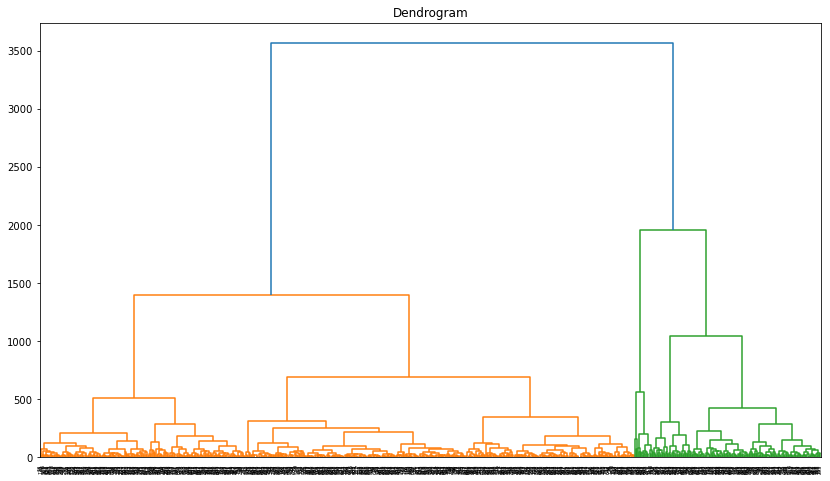

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 8))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(clustering_dataset, method='ward'))

Cut-off line 1: separates two clusters

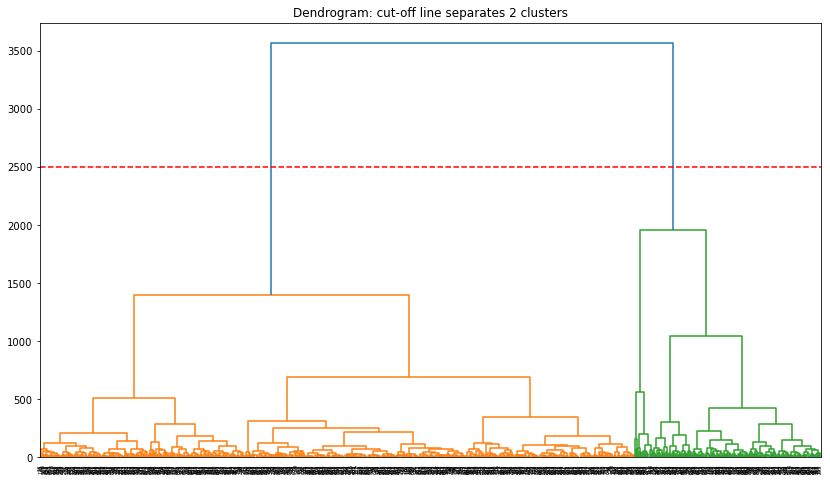

In [76]:
plt.figure(figsize=(14, 8))
plt.title("Dendrogram: cut-off line separates 2 clusters")
dendrogram = shc.dendrogram(shc.linkage(clustering_dataset, method='ward'))
plt.plot([0, 100000], [2500, 2500], 'r--')

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 8))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(clustering_dataset, method='ward'))

In [26]:
from sklearn.cluster import AgglomerativeClustering
# creating the algorithm model, which contains 8 features
cl1 = AgglomerativeClustering()
cl1.fit(clustering_dataset)
print(f'Number of clusters: {cl1.n_clusters_}')
cluster_1 = [ i for i, x in enumerate(cl1.labels_) if x == 1]
cluster_2 = [ i for i, x in enumerate(cl1.labels_) if x == 0]
print(f'Objects of cluster 1: {len(cluster_1)}')
print(f'Objects of cluster 2: {len(cluster_2)}')

Number of clusters: 2
Objects of cluster 1: 585
Objects of cluster 2: 183


Cut-off line 2: separates three clusters

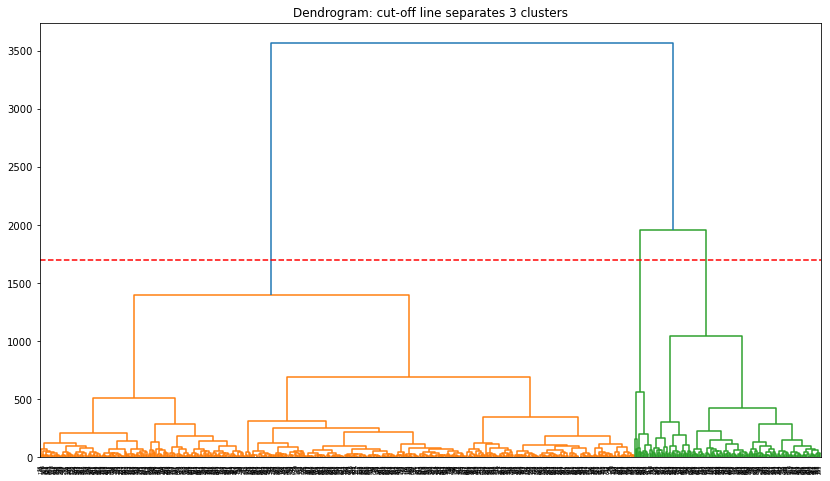

In [77]:
plt.figure(figsize=(14, 8))
plt.title("Dendrogram: cut-off line separates 3 clusters")
dendrogram = shc.dendrogram(shc.linkage(clustering_dataset, method='ward'))
plt.plot([0, 100000], [1700, 1700], 'r--')

In [67]:
cl2 = AgglomerativeClustering(n_clusters=3)
cl2.fit(clustering_dataset)
print(f'Number of clusters: {cl2.n_clusters_}')
cluster_1 = [ i for i, x in enumerate(cl2.labels_) if x == 0]
cluster_2 = [ i for i, x in enumerate(cl2.labels_) if x == 1]
cluster_3 = [ i for i, x in enumerate(cl2.labels_) if x == 2]
print(f'Objects of cluster 1: {len(cluster_1)}')
print(f'Objects of cluster 2: {len(cluster_2)}')
print(f'Objects of cluster 3: {len(cluster_3)}')

Number of clusters: 3
Objects of cluster 1: 585
Objects of cluster 2: 165
Objects of cluster 3: 18


Cut-off line 3: separates four clusters

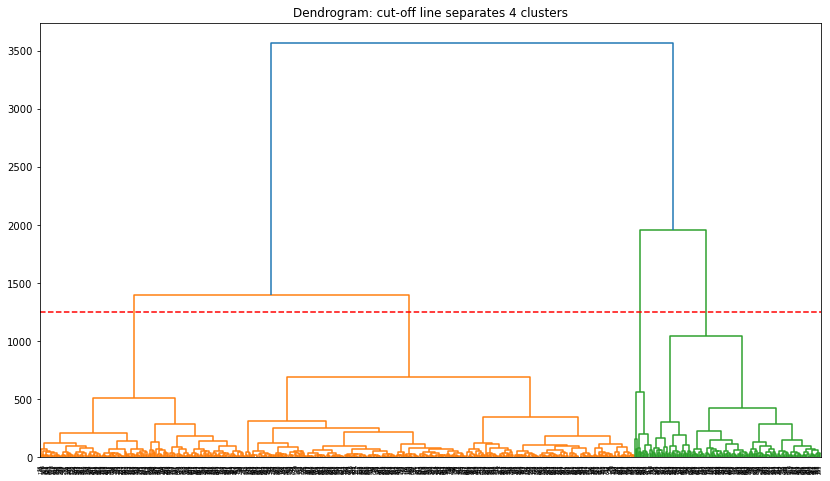

In [79]:
plt.figure(figsize=(14, 8))
plt.title("Dendrogram: cut-off line separates 4 clusters")
dendrogram = shc.dendrogram(shc.linkage(clustering_dataset, method='ward'))
plt.plot([0, 100000], [1250, 1250], 'r--')

In [27]:
cl3 = AgglomerativeClustering(n_clusters=4)
cl3.fit(clustering_dataset)
print(f'Number of clusters: {cl3.n_clusters_}')
cluster_1 = [ i for i, x in enumerate(cl3.labels_) if x == 3]
cluster_2 = [ i for i, x in enumerate(cl3.labels_) if x == 1]
cluster_3 = [ i for i, x in enumerate(cl3.labels_) if x == 2]
cluster_4 = [ i for i, x in enumerate(cl3.labels_) if x == 0]
print(f'Objects of cluster 1: {len(cluster_1)}')
print(f'Objects of cluster 2: {len(cluster_2)}')
print(f'Objects of cluster 3: {len(cluster_3)}')
print(f'Objects of cluster 4: {len(cluster_4)}')

Number of clusters: 4
Objects of cluster 1: 202
Objects of cluster 2: 383
Objects of cluster 3: 18
Objects of cluster 4: 165


# Artificial Neural Networks

1st model: 2 hidden layers with 32 neurons in each, learning rate is equal to 0.05

In [36]:
# library import for splitting the dataset into training and testing parts
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# separate target labels from the dataset
targets = my_dataset['Outcome']
# how much percentage of the dataset will be used for training
training_proportion = 0.7
# splitting the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1-training_proportion, random_state=42)
model_1 = MLPClassifier(hidden_layer_sizes=(32,32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_1.fit(X_train, y_train)

Iteration 1, loss = 0.66915716
Iteration 2, loss = 0.64775727
Iteration 3, loss = 0.64976080
Iteration 4, loss = 0.64765303
Iteration 5, loss = 0.64449365
Iteration 6, loss = 0.64497824
Iteration 7, loss = 0.64247867
Iteration 8, loss = 0.64034554
Iteration 9, loss = 0.63968771
Iteration 10, loss = 0.63839605
Iteration 11, loss = 0.63953063
Iteration 12, loss = 0.63662670
Iteration 13, loss = 0.63436794
Iteration 14, loss = 0.63282758
Iteration 15, loss = 0.63094850
Iteration 16, loss = 0.62983670
Iteration 17, loss = 0.62761921
Iteration 18, loss = 0.62541958
Iteration 19, loss = 0.62506700
Iteration 20, loss = 0.62132519
Iteration 21, loss = 0.61844761
Iteration 22, loss = 0.61659017
Iteration 23, loss = 0.61618308
Iteration 24, loss = 0.61289785
Iteration 25, loss = 0.61001883
Iteration 26, loss = 0.60666092
Iteration 27, loss = 0.60164937
Iteration 28, loss = 0.59942896
Iteration 29, loss = 0.59673446
Iteration 30, loss = 0.59300214
Iteration 31, loss = 0.59040179
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 32),
              learning_rate_init=0.05, max_iter=500, solver='sgd', verbose=1)

####Performance analysis

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       151
           1       0.61      0.45      0.52        80

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.70      0.71      0.70       231



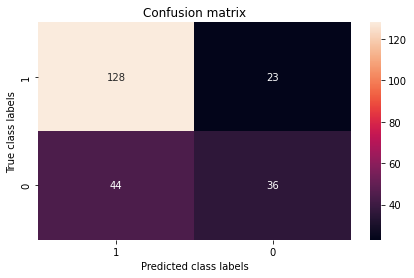

In [37]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
y_predictions_1 = model_1.predict(X_test)
print(classification_report(y_test, y_predictions_1, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_1)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

#### The confusion matrix shows that 44 data objects with label 1 was mistakenly classified as 0, and 23 data objects with label 1 was classified as 0. In total: 67 out of 231 data objects were misclassified: overall accuracy 71%. 

2nd model: hidden layers sizes are icreased up to 86 neurons each

In [42]:
model_2 = MLPClassifier(hidden_layer_sizes=(86,86), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_2.fit(X_train, y_train)

Iteration 1, loss = 0.65078865
Iteration 2, loss = 0.64430769
Iteration 3, loss = 0.64203968
Iteration 4, loss = 0.64273542
Iteration 5, loss = 0.63822367
Iteration 6, loss = 0.63547157
Iteration 7, loss = 0.63376242
Iteration 8, loss = 0.63079459
Iteration 9, loss = 0.62988773
Iteration 10, loss = 0.62577181
Iteration 11, loss = 0.62417387
Iteration 12, loss = 0.61884160
Iteration 13, loss = 0.61526617
Iteration 14, loss = 0.61371528
Iteration 15, loss = 0.61183688
Iteration 16, loss = 0.60622862
Iteration 17, loss = 0.60172489
Iteration 18, loss = 0.59440674
Iteration 19, loss = 0.59354726
Iteration 20, loss = 0.59919044
Iteration 21, loss = 0.59036966
Iteration 22, loss = 0.58322220
Iteration 23, loss = 0.58191877
Iteration 24, loss = 0.57747749
Iteration 25, loss = 0.57677330
Iteration 26, loss = 0.58084021
Iteration 27, loss = 0.56725094
Iteration 28, loss = 0.56523381
Iteration 29, loss = 0.56468511
Iteration 30, loss = 0.56482947
Iteration 31, loss = 0.56558294
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(86, 86),
              learning_rate_init=0.05, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       151
           1       0.61      0.17      0.27        80

    accuracy                           0.68       231
   macro avg       0.65      0.56      0.53       231
weighted avg       0.66      0.68      0.61       231



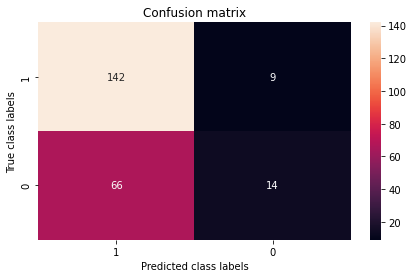

In [43]:
y_predictions_2 = model_2.predict(X_test)
print(classification_report(y_test, y_predictions_2, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_2)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

#### The accuracy of the second model is only 68%: this model overfits the training data due to the too large number of neurons

3rd model: one hidden layer with 64 neurons, learning rate is 0.01

In [44]:
model_3 = MLPClassifier(hidden_layer_sizes=(64), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.1, verbose=1)
model_3.fit(X_train, y_train)

Iteration 1, loss = 0.63847180
Iteration 2, loss = 0.65031187
Iteration 3, loss = 0.64640409
Iteration 4, loss = 0.65530899
Iteration 5, loss = 0.61076228
Iteration 6, loss = 0.61108918
Iteration 7, loss = 0.62922304
Iteration 8, loss = 0.62996774
Iteration 9, loss = 0.60893968
Iteration 10, loss = 0.63437393
Iteration 11, loss = 0.62429816
Iteration 12, loss = 0.58944538
Iteration 13, loss = 0.60342745
Iteration 14, loss = 0.58453842
Iteration 15, loss = 0.59251404
Iteration 16, loss = 0.58635308
Iteration 17, loss = 0.57606722
Iteration 18, loss = 0.58976928
Iteration 19, loss = 0.61186575
Iteration 20, loss = 0.59132721
Iteration 21, loss = 0.58460129
Iteration 22, loss = 0.58449591
Iteration 23, loss = 0.61665241
Iteration 24, loss = 0.58672844
Iteration 25, loss = 0.58573472
Iteration 26, loss = 0.59740812
Iteration 27, loss = 0.57653936
Iteration 28, loss = 0.65472583
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=64,
              learning_rate_init=0.1, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       151
           1       0.47      0.35      0.40        80

    accuracy                           0.64       231
   macro avg       0.59      0.57      0.57       231
weighted avg       0.62      0.64      0.63       231



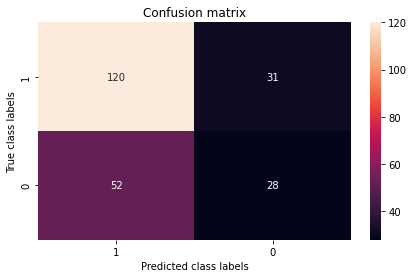

In [45]:
y_predictions_3 = model_3.predict(X_test)
print(classification_report(y_test, y_predictions_3, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_3)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is only 64%: learning rate is too high in this model

model 4: one hidden layer with 32 neurons, learning rate is 0.02

In [46]:
model_4 = MLPClassifier(hidden_layer_sizes=(32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.02, verbose=1)
model_4.fit(X_train, y_train)

Iteration 1, loss = 0.68790783
Iteration 2, loss = 0.63841848
Iteration 3, loss = 0.63405463
Iteration 4, loss = 0.62161333
Iteration 5, loss = 0.61435040
Iteration 6, loss = 0.61004157
Iteration 7, loss = 0.60344310
Iteration 8, loss = 0.59852400
Iteration 9, loss = 0.59532415
Iteration 10, loss = 0.59428321
Iteration 11, loss = 0.58720785
Iteration 12, loss = 0.58507992
Iteration 13, loss = 0.58153246
Iteration 14, loss = 0.57747972
Iteration 15, loss = 0.57285772
Iteration 16, loss = 0.57099238
Iteration 17, loss = 0.56759156
Iteration 18, loss = 0.57386382
Iteration 19, loss = 0.57052094
Iteration 20, loss = 0.56212011
Iteration 21, loss = 0.58238929
Iteration 22, loss = 0.57835362
Iteration 23, loss = 0.57279454
Iteration 24, loss = 0.56433811
Iteration 25, loss = 0.56599992
Iteration 26, loss = 0.56228795
Iteration 27, loss = 0.55728785
Iteration 28, loss = 0.55844865
Iteration 29, loss = 0.56254962
Iteration 30, loss = 0.55739055
Iteration 31, loss = 0.56058338
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=32,
              learning_rate_init=0.02, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.58      0.53      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231

[[120  31]
 [ 38  42]]


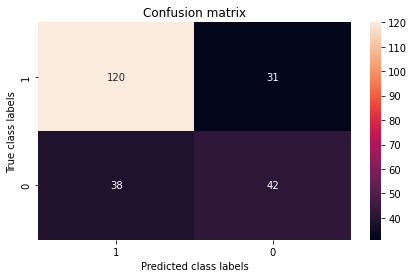

In [47]:
y_predictions_4 = model_4.predict(X_test)
print(classification_report(y_test, y_predictions_4, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_4)
print(conf_matrix)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is 70%, it performed slightly worse then the first one. Therefore, after conducted experiments the first model is declared as the most accurate and reliable model out of 4 models tested. 

&nbsp;

&nbsp;

&nbsp;

# Gradient Boosting Algorithm

### Model 1

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score 

In [33]:
targetsGB = my_dataset['Outcome']
training_proportionGB = 0.7
X_trainGB, X_testGB, y_trainGB, y_testGB = train_test_split(clustering_dataset, targetsGB, test_size=1-training_proportionGB, random_state=42)

In [58]:
modelGB = GradientBoostingClassifier(n_estimators=5000,
                                     learning_rate=0.05,
                                     max_depth=3,
                                     subsample=0.5,
                                     validation_fraction=0.1,
                                     n_iter_no_change=20,
                                     max_features='log2', 
                                     verbose=1, 
                                     random_state=42
                                    )
modelGB.fit(X_trainGB, y_trainGB)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2658           0.0297           19.76s
         2           1.2253           0.0139           17.37s
         3           1.2231           0.0470           16.74s
         4           1.2191           0.0524           16.30s
         5           1.1425          -0.0436           17.02s
         6           1.1691           0.0721           17.51s
         7           1.1308           0.0082           17.09s
         8           1.0899          -0.0103           16.88s
         9           1.1266           0.0607           17.21s
        10           1.1060           0.0117           17.49s
        20           0.9416          -0.0035           13.96s
        30           0.8705           0.0364           12.26s
        40           0.8348           0.0538           11.40s
        50           0.7741           0.0502           11.58s
        60           0.7655          -0.0019           11.53s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           random_state=42, subsample=0.5, verbose=1)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



0.7272727272727273

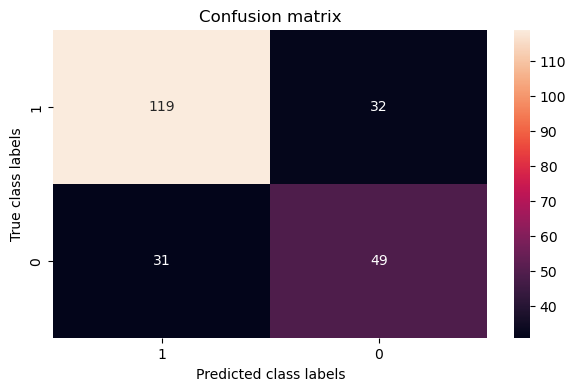

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
y_predictions_1GB = modelGB.predict(X_testGB)
print(classification_report(y_testGB, y_predictions_1GB, zero_division=0))
conf_matrix = confusion_matrix(y_testGB, y_predictions_1GB)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testGB, y_predictions_1GB)

__The accuracy for this model is equal to 0.727 %.__

&nbsp;

### Model 2

In [60]:
modelGB2 = GradientBoostingClassifier(n_estimators=4000,
                                     learning_rate=0.08,
                                     max_depth=8,
                                     subsample=0.5,
                                     validation_fraction=0.1,
                                     n_iter_no_change=20,
                                     max_features='log2', 
                                     verbose=1, 
                                     random_state=42)
modelGB2.fit(X_trainGB, y_trainGB)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1995           0.0454           32.33s
         2           1.0864           0.0507           35.96s
         3           1.0265           0.0854           42.77s
         4           0.9880           0.0938           42.05s
         5           0.9269           0.0390           39.95s
         6           0.8790           0.0686           40.67s
         7           0.8275           0.0479           39.98s
         8           0.7591           0.0042           39.46s
         9           0.7740           0.0819           37.73s
        10           0.7276           0.0255           36.74s
        20           0.4686           0.0005           31.26s
        30           0.3382           0.0327           29.38s
        40           0.2734           0.0119           27.43s
        50           0.2012           0.0109           26.55s
        60           0.1694          -0.0053           26.08s


GradientBoostingClassifier(learning_rate=0.08, max_depth=8, max_features='log2',
                           n_estimators=4000, n_iter_no_change=20,
                           random_state=42, subsample=0.5, verbose=1)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



0.7619047619047619

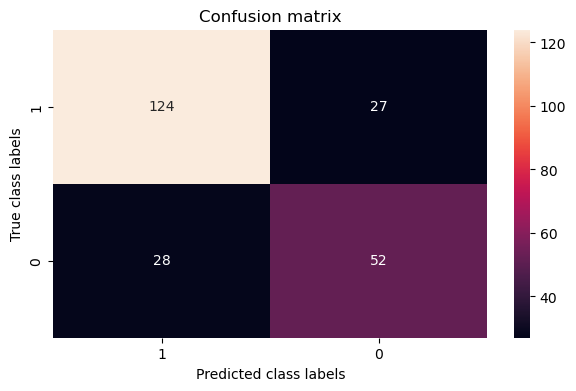

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_2GB = modelGB2.predict(X_testGB)
print(classification_report(y_testGB, y_predictions_2GB, zero_division=0))
conf_matrix = confusion_matrix(y_testGB, y_predictions_2GB)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testGB, y_predictions_2GB)

__The accuracy for this model is equal to 0.761 %.__

&nbsp;

### Model 3

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5067           0.1146           66.51m
         2           0.3146          -0.2330           74.85m
         3           0.2889          -0.1168           60.74m
         4           0.2571          -5.8738           58.03m
         5           0.1644          -3.4648           53.23m
         6           0.0188       -2730.0146           52.70m
         7           0.0633          -0.0136           49.82m
         8           0.1620           0.0654           49.84m
         9           0.0031          -0.0398           48.16m
        10           0.0827          -0.0874           48.27m
        20           0.0277          -0.0411           39.97m
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       151
           1       0.58      0.45      0.51        80

    accuracy                           0.70       231
   macro avg       0.66      0.64    

0.696969696969697

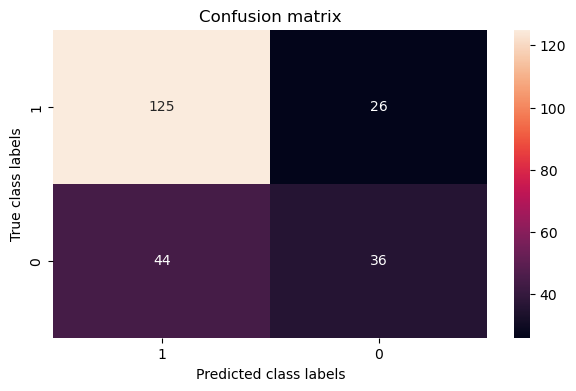

In [62]:
modelGB3 = GradientBoostingClassifier(n_estimators=1000000,
                                     learning_rate=0.56,
                                     max_depth=8,
                                     subsample=0.1,
                                     validation_fraction=0.9,
                                     n_iter_no_change=20,
                                     max_features= 'log2', 
                                     verbose=1, 
                                     random_state=42)
modelGB3.fit(X_trainGB, y_trainGB)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_3GB = modelGB3.predict(X_testGB)
print(classification_report(y_testGB, y_predictions_3GB, zero_division=0))
conf_matrix = confusion_matrix(y_testGB, y_predictions_3GB)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testGB, y_predictions_3GB)

__The accuracy for this model is equal to 0.696 %.__

#### We can conclude that the best model for Gradient Boosting Algorithm was the second one with 0.761 % of accuracy.

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Random Forest Algorithm

### Model 1 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
training_proportionRF=0.7
targetsRF=my_dataset['Outcome']
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(clustering_dataset, targetsRF, test_size=1-training_proportionRF, random_state=42)

In [56]:
from sklearn import metrics
modelRF = RandomForestClassifier(n_estimators=1000, max_features='sqrt', max_depth=6, min_samples_split=0.2, min_samples_leaf=5, bootstrap=True, random_state=42)
modelRF.fit(X_trainRF, y_trainRF)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=0.2,
                       n_estimators=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.55      0.61        80

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



0.7575757575757576

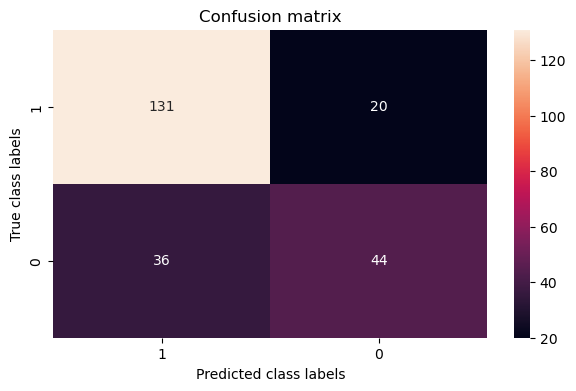

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_1RF = modelRF.predict(X_testRF)
print(classification_report(y_testRF, y_predictions_1RF, zero_division=0))
conf_matrix = confusion_matrix(y_testRF, y_predictions_1RF)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testRF, y_predictions_1RF)

__The accuracy for this model is equal to 0.757 %.__

&nbsp;

### Model 2

In [50]:
from sklearn import metrics
model2RF = RandomForestClassifier(n_estimators=1000, max_features='sqrt', max_depth=4, min_samples_split=0.05, min_samples_leaf=3, bootstrap=True, random_state=42)
model2RF.fit(X_trainRF, y_trainRF)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=0.05,
                       n_estimators=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       151
           1       0.70      0.57      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



0.7662337662337663

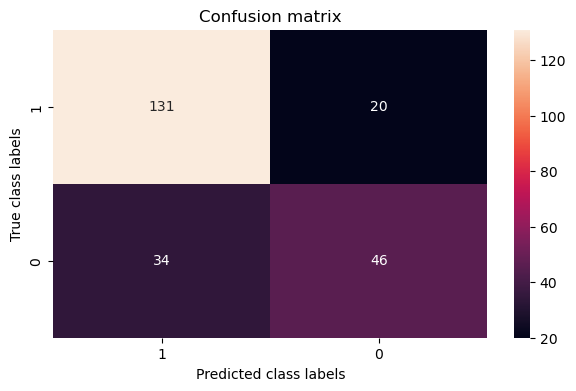

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_2RF = model2RF.predict(X_testRF)
print(classification_report(y_testRF, y_predictions_2RF, zero_division=0))
conf_matrix = confusion_matrix(y_testRF, y_predictions_2RF)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testRF, y_predictions_2RF)

__The accuracy for this model is equal to 0.766 %.__

&nbsp;

### Model 3

In [48]:
model3RF = RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth=5, min_samples_split=0.8, min_samples_leaf=8, bootstrap=True, random_state=42)
model3RF.fit(X_trainRF, y_trainRF)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=8,
                       min_samples_split=0.8, n_estimators=1000,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



0.6536796536796536

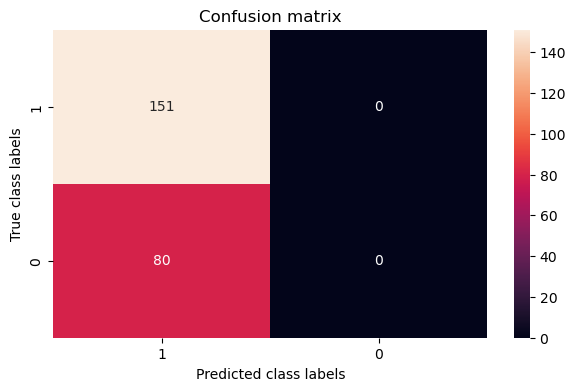

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_3RF = model3RF.predict(X_testRF)
print(classification_report(y_testRF, y_predictions_3RF, zero_division=0))
conf_matrix = confusion_matrix(y_testRF, y_predictions_3RF)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testRF, y_predictions_3RF)

__The accuracy for this model is equal to 0.653 %.__

#### We can then conclude that the best model for the Random Forest Algorithm was the second one with 0.766% of accuracy. 